In [42]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta, binom
import numpy as np
import datetime as dt
import timeit

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import (roc_auc_score, confusion_matrix, accuracy_score, roc_curve, auc, 
classification_report, hamming_loss, mean_absolute_error)

import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline

# Question 1

In [3]:
applications = pd.read_csv('teacher_application_sample.csv')

In [5]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   d2_total_score            1000 non-null   int64  
 1   d2_approval_flag          1000 non-null   int64  
 2   submitted_at              1000 non-null   object 
 3   reviewed_at               1000 non-null   object 
 4   action_date               1000 non-null   object 
 5   teacher_source            1000 non-null   object 
 6   signup_to_submit_days     1000 non-null   int64  
 7   len_class_types           1000 non-null   int64  
 8   len_teaching_credentials  1000 non-null   int64  
 9   len_teaching_experience   1000 non-null   int64  
 10  len_total                 1000 non-null   int64  
 11  video_size                993 non-null    float64
 12  education_degree_yn       1000 non-null   int64  
 13  bachelor_degree_yn        1000 non-null   int64  
 14  master_de

In [6]:
applications.describe()

,d2_total_score,d2_approval_flag,signup_to_submit_days,len_class_types,len_teaching_credentials,len_teaching_experience,len_total,video_size,education_degree_yn,bachelor_degree_yn,...,nanny_yn,online_yn,countries_yn,tutor_yn,mentor_yn,volunteer_yn,teacher_yn,public_yn,parent_yn,professional_yn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,9.930000e+02,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,16.799000,0.612000,33.911000,411.122000,236.861000,565.419000,1213.402000,2.818873e+07,0.339000,0.620000,...,0.045000,0.25600,0.015000,0.198000,0.04600,0.167000,0.720000,0.140000,0.060000,0.110000
std,7.065304,0.487538,120.563646,500.013532,245.712837,753.753809,1115.321136,2.481034e+07,0.473607,0.485629,...,0.207408,0.43664,0.121613,0.398692,0.20959,0.373162,0.449224,0.347161,0.237606,0.313046
min,0.000000,0.000000,-11.000000,8.000000,3.000000,13.000000,83.000000,2.000000e+00,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,115.750000,105.000000,215.000000,549.000000,9.943276e+06,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,1.000000,1.000000,263.500000,176.000000,380.000000,928.000000,1.984920e+07,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,21.000000,1.000000,9.000000,531.000000,284.000000,658.250000,1487.250000,3.736460e+07,1.000000,1.000000,...,0.000000,1.00000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
max,24.000000,1.000000,1156.000000,6523.000000,2997.000000,14927.000000,15703.000000,1.040477e+08,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
applications.tail(10)

,d2_total_score,d2_approval_flag,submitted_at,reviewed_at,action_date,teacher_source,signup_to_submit_days,len_class_types,len_teaching_credentials,len_teaching_experience,...,online_yn,countries_yn,tutor_yn,mentor_yn,volunteer_yn,teacher_yn,public_yn,parent_yn,professional_yn,formal_degree_yn
990,0,0,2020-05-02T07:59:11.799-07:00,2020-05-02T16:38:57.382-07:00,2020-05-02T16:38:57.471-07:00,other,0,129,83,65,...,0,0,0,0,0,0,0,0,0,0
991,13,0,2020-05-14T21:27:22.264-07:00,2020-05-17T20:30:55.961-07:00,2020-05-17T20:30:56.212-07:00,other,1,33,336,133,...,0,0,0,0,0,0,0,0,0,0
992,0,0,2020-05-20T10:28:15.129-07:00,2020-05-20T17:12:14.936-07:00,2020-05-20T17:12:15.029-07:00,organic_facebook,55,69,31,128,...,1,0,0,0,0,1,0,0,0,0
993,14,0,2020-05-13T15:12:14.147-07:00,2020-05-16T12:34:11.175-07:00,2020-05-16T12:34:11.269-07:00,organic_google,0,198,115,152,...,0,0,0,0,1,0,0,0,0,0
994,22,1,2020-05-02T18:04:32.640-07:00,2020-05-03T00:37:40.164-07:00,2020-05-03T00:37:40.255-07:00,share,2,121,182,349,...,1,0,0,0,0,1,0,0,0,0
995,19,1,2020-05-07T09:06:41.003-07:00,2020-05-08T08:19:19.445-07:00,2020-05-08T08:19:19.661-07:00,existing parent,4,90,34,495,...,0,0,0,0,0,1,0,0,1,0
996,23,1,2020-05-09T06:34:32.128-07:00,2020-05-09T12:22:28.678-07:00,2020-05-09T12:22:28.767-07:00,other,1,1214,781,811,...,0,0,1,0,1,1,1,0,0,1
997,13,0,2020-05-18T16:17:23.673-07:00,2020-05-23T12:57:08.771-07:00,2020-05-23T12:57:08.864-07:00,paid_fb_other,64,172,321,221,...,0,0,1,0,0,0,0,0,0,0
998,18,0,2020-05-21T10:12:12.978-07:00,2020-05-27T05:10:13.244-07:00,2020-05-27T05:10:13.353-07:00,share,1,195,68,152,...,0,0,0,0,0,1,0,0,0,0
999,19,1,2020-05-21T10:12:12.978-07:00,2020-05-27T05:10:13.244-07:00,2020-06-02T17:00:41.395-07:00,share,1,195,68,152,...,0,0,0,0,0,1,0,0,0,0


In [31]:
applications.video_size

0      24822128.0
1      95595125.0
2      95595125.0
3       3208525.0
4      17072921.0
          ...    
995     5537333.0
996    11385302.0
997    25894519.0
998    29315727.0
999    29315727.0
Name: video_size, Length: 1000, dtype: float64

In [40]:
print('10th percentile:', applications['signup_to_submit_days'].quantile(0.1)
      , ','
      , '90th percentile:', applications['signup_to_submit_days'].quantile(0.9))

10th percentile: 0.0 , 90th percentile: 49.0


In [35]:
print('10th percentile:', applications['len_class_types'].quantile(0.1)
      , ','
      , '90th percentile:', applications['len_class_types'].quantile(0.9))

10th percentile: 62.900000000000006 , 90th percentile: 924.1


In [37]:
print('10th percentile:', applications['len_teaching_credentials'].quantile(0.1)
      , ','
      , '90th percentile:', applications['len_teaching_credentials'].quantile(0.9))

10th percentile: 65.9 , 90th percentile: 439.1


In [38]:
print('10th percentile:', applications['len_teaching_experience'].quantile(0.1)
      , ','
      , '90th percentile:', applications['len_teaching_experience'].quantile(0.9))

10th percentile: 132.9 , 90th percentile: 1205.6000000000004


In [39]:
print('10th percentile:', applications['len_total'].quantile(0.1)
      , ','
      , '90th percentile:', applications['len_total'].quantile(0.9))

10th percentile: 354.70000000000005 , 90th percentile: 2453.4000000000005


Are any fields missing data? How should we handle it for analysis / modeling purposes?
Video size is missing 7 records. We can try imputing based on distribution of observed sizes or remove the 7 records from our analysis since it is a small number of total observations.

Do any fields have outliers? How should we handle it for analysis / modeling purposes?
It looks like columns 'Signup to submit days', 'Len class types', 'Len teaching credentials', 'Len teaching experience', and 'Len total' all have some outliers on the longer / larger end. We can apply Tukey's method for identifying outliers and investigate if these reflect specific cases that should be removed from the dataset when modeling.

How would we go about creating a new 1-hot attribute for whether or not an applicant has any kind of formal degree (education, bachelor, masters, or PhD)? 

In [10]:
applications['formal_degree_yn'] = applications['phd_degree_yn'].combine_first(applications['masters_degree_yn'])

In [29]:
applications.iloc[0:10, :20]

,d2_total_score,d2_approval_flag,submitted_at,reviewed_at,action_date,teacher_source,signup_to_submit_days,len_class_types,len_teaching_credentials,len_teaching_experience,len_total,video_size,education_degree_yn,bachelor_degree_yn,master_degree_yn,phd_degree_yn,nanny_yn,online_yn,countries_yn,tutor_yn
0,19,1,2020-05-13T11:27:57.877-07:00,2020-05-16T11:37:53.433-07:00,2020-05-16T11:37:53.622-07:00,organic_other,0,1099,165,1029,2293,24822128.0,0,1,0,0,1,1,0,0
1,18,0,2020-05-13T02:05:30.256-07:00,2020-05-15T16:29:25.357-07:00,2020-05-15T16:29:25.437-07:00,share,8,232,272,266,770,95595125.0,1,1,0,0,0,1,0,0
2,18,1,2020-05-13T02:05:30.256-07:00,2020-05-15T16:29:25.357-07:00,2020-05-24T05:27:51.730-07:00,share,8,232,272,266,770,95595125.0,1,1,0,0,0,1,0,0
3,18,1,2020-05-18T19:07:11.818-07:00,2020-05-24T05:27:51.651-07:00,2020-05-24T05:27:51.730-07:00,share,14,711,272,260,1243,3208525.0,1,1,0,0,0,1,0,0
4,21,1,2020-05-20T08:24:09.300-07:00,2020-05-24T21:25:51.824-07:00,2020-05-24T21:25:51.912-07:00,share,16,500,184,512,1196,17072921.0,0,1,1,0,0,0,0,1
5,0,0,2020-05-24T11:35:56.273-07:00,2020-05-24T12:26:59.421-07:00,2020-05-24T12:26:59.495-07:00,organic_other,4,36,195,254,485,16968186.0,1,1,1,0,0,0,0,0
6,19,1,2020-05-04T21:03:20.708-07:00,2020-05-05T15:04:10.995-07:00,2020-05-05T15:04:11.089-07:00,organic_google,0,301,52,380,733,10227930.0,0,0,0,0,0,0,0,1
7,24,1,2020-05-10T21:17:32.661-07:00,2020-05-11T00:58:15.562-07:00,2020-05-11T00:58:15.652-07:00,organic_google,0,175,139,1173,1487,16783327.0,0,1,0,0,0,1,0,0
8,19,0,2020-05-19T08:59:56.391-07:00,2020-05-23T23:25:22.624-07:00,2020-05-23T23:25:22.819-07:00,organic_google,8,104,59,202,365,10537403.0,0,1,0,0,0,1,0,0
9,20,1,2020-05-19T08:59:56.391-07:00,2020-05-23T23:25:22.624-07:00,2020-06-07T15:37:37.720-07:00,organic_google,8,104,59,202,365,10537403.0,0,1,0,0,0,1,0,0


In [30]:
applications['formal_degree_yn'] = applications['bachelor_degree_yn'].combine_first(applications['master_degree_yn']).combine_first(applications['phd_degree_yn']).combine_first(applications['education_degree_yn'])

In [26]:
#alternative: applications.iloc[:, 12:16].sum(axis = 1)

0      1
1      2
2      2
3      2
4      2
      ..
995    1
996    3
997    0
998    1
999    1
Length: 1000, dtype: int64

# Question 2

What does the approval rate look like when we segment by application score?

What does the distribution of applications look like by teacher source? 
Has this changed over time?

Of the non-education related 1-hot attributes, which segmentations are most and least common in our sample?

Which pairs of attributes have the highest correlation?

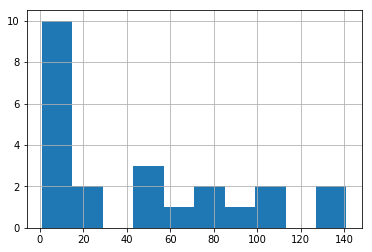

In [53]:
applications.groupby(['d2_total_score']).d2_approval_flag.count()

applications.groupby(['d2_total_score']).d2_approval_flag.count().hist()

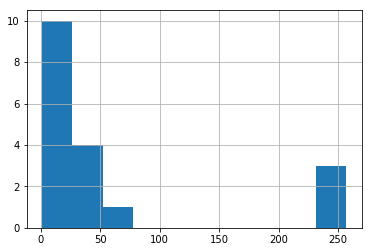

In [48]:
applications.groupby(['teacher_source']).d2_approval_flag.count()

applications.groupby(['teacher_source']).d2_approval_flag.count().hist()

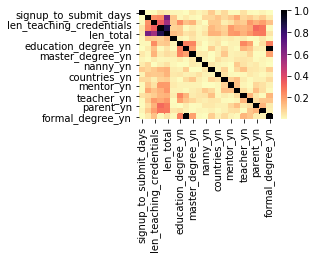

In [56]:
X = applications.drop(['d2_total_score', 'd2_approval_flag'], axis = 1)

fig = plt.figure(figsize=(3, 2))
sns.heatmap(abs(X.corr()), cmap='magma_r');

# Question 3

**Running out of time so answering in text below

Which features are most important in predicting the likelihood of application approval?
I would look at the correlation between each of the variables to the total score and application approval.

What are the tradeoffs between different modeling techniques you'd consider for this problem?

How accurate is your baseline model? How would you approach validation?
I would look at linear and logistic regressions first (also look at false negatives and positives, recall, precision, etc) and use cross-validation methods to determine whether we could better predict an outcome.

What steps could we take to improve the model with regards to data collection and feature engineering?
We could feed in more real-time data and see whether the approval rating increases with a Naive Bayes approach (starting with our hypothesis as what we see here in the first dataset).